In [4]:
import pandas as pd
from scipy import stats

In [14]:
data = pd.read_csv('../Data/cleaned_data.csv')
data

,Country name,year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region Name,Death Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
0,Albania,2007,4.634,9.122,0.821,66.760,0.529,-0.010,0.875,0.489,0.246,Europe,124.0,0.853524,4.055986,4.175055
1,Albania,2010,5.269,9.283,0.733,67.600,0.569,-0.174,0.726,0.576,0.300,Europe,96.0,0.790839,3.079254,3.295539
2,Argentina,2006,6.313,9.937,0.938,65.820,0.733,-0.160,0.852,0.748,0.328,Central and South America,3119.0,1.067007,7.862171,7.938431
3,Argentina,2007,6.073,10.013,0.862,65.940,0.653,-0.144,0.881,0.750,0.279,Central and South America,2955.0,0.941767,7.357417,7.446271
4,Argentina,2008,5.961,10.043,0.892,66.060,0.678,-0.135,0.865,0.720,0.318,Central and South America,3071.0,1.024770,7.570164,7.662145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,Venezuela,2012,7.067,9.862,0.932,65.220,0.804,-0.199,0.743,0.844,0.176,Central and South America,731.0,0.493629,2.629027,2.489711
1005,Venezuela,2013,6.553,9.802,0.896,65.180,0.642,-0.228,0.837,0.812,0.238,Central and South America,618.0,0.412341,2.171715,2.075146
1006,Venezuela,2014,6.136,9.366,0.904,65.140,0.570,-0.188,0.827,0.797,0.244,Central and South America,569.0,0.350964,1.994035,1.893954
1007,Venezuela,2015,5.569,8.532,0.911,65.100,0.512,-0.086,0.813,0.837,0.223,Central and South America,575.0,0.341737,2.010758,1.911453


In [3]:
variables = [
    'Happiness Score',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Positive affect',
    'Negative affect',
    'Death rate per 100 000 population'  # This is used as a proxy for 'Suicide rate' as it's not explicitly mentioned in the data
]

In [12]:
normaltest_results = {}
for var in variables:
    _, p = stats.normaltest(data[var])
    normaltest_results[var] = p
normaltest_results

{'Happiness Score': 4.8633234409786144e-05,
 'Log GDP per capita': 1.3004043007219748e-07,
 'Social support': 1.3538827386251345e-79,
 'Healthy life expectancy at birth': 1.6204773624645084e-45,
 'Freedom to make life choices': 1.646220637380502e-17,
 'Generosity': 1.948831974867042e-13,
 'Perceptions of corruption': 2.2485796351973638e-36,
 'Positive affect': 6.798516108659586e-15,
 'Negative affect': 1.937656736765462e-28,
 'Death rate per 100 000 population': 1.5731936235911215e-25}

In [13]:
levene_test_results = {}
for var in variables:
    grouped_data = [data[var][data['Region Name'] == region] for region in data['Region Name'].unique()]
    _, p = stats.levene(*grouped_data, center='median')
    levene_test_results[var] = p
levene_test_results

{'Happiness Score': 6.813870837806359e-21,
 'Log GDP per capita': 3.243102932738996e-23,
 'Social support': 2.4749354957295984e-22,
 'Healthy life expectancy at birth': 4.0043920015946545e-32,
 'Freedom to make life choices': 3.2176609659181775e-33,
 'Generosity': 6.049439352973e-20,
 'Perceptions of corruption': 5.1312203472318434e-27,
 'Positive affect': 1.6889286210987497e-45,
 'Negative affect': 1.9072841643018125e-29,
 'Death rate per 100 000 population': 7.375435728588774e-15}

In [15]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis H-test
kruskal_results = {}
for var in variables:
    grouped_data = [data[var][data['Region Name'] == region] for region in data['Region Name'].unique()]
    stat, p = kruskal(*grouped_data)
    kruskal_results[var] = p

kruskal_results

{'Happiness Score': 2.1058625584554454e-30,
 'Log GDP per capita': 3.031867249049851e-64,
 'Social support': 6.517122334170141e-44,
 'Healthy life expectancy at birth': 8.479709166970086e-19,
 'Freedom to make life choices': 7.047115849618886e-16,
 'Generosity': 6.762839756456887e-16,
 'Perceptions of corruption': 6.46268311846754e-15,
 'Positive affect': 1.701939487900591e-78,
 'Negative affect': 3.1029802491641434e-14,
 'Death rate per 100 000 population': 2.7431498206300697e-65}

In [16]:
data_combined = pd.read_csv('../Data/combined.csv')
latest_data_per_country = data_combined.loc[data_combined.groupby('Country name')['Year'].idxmax()]

In [17]:
latest_data_per_country

,Country name,year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,Country Code,Country Name,Year,Sex,Age group code,Age Group,Death Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
2,Albania,2010,5.269,9.283,0.733,67.600,0.569,-0.174,0.726,0.576,...,ALB,Albania,2010,All,Age_all,[All],96.0,0.790839,3.079254,3.295539
17,Argentina,2020,5.901,9.888,0.897,67.150,0.823,-0.129,0.816,0.679,...,ARG,Argentina,2020,All,Age_all,[All],2872.0,0.763385,6.144159,6.354576
32,Armenia,2021,5.301,9.561,0.762,67.650,0.795,-0.156,0.705,0.566,...,ARM,Armenia,2021,All,Age_all,[All],53.0,0.154124,1.461555,1.785638
46,Australia,2021,7.112,10.815,0.920,71.050,0.912,0.236,0.454,0.740,...,AUS,Australia,2021,All,Age_all,[All],3144.0,1.833568,11.122621,12.239140
60,Austria,2021,7.080,10.899,0.863,71.150,0.795,0.159,0.501,0.722,...,AUT,Austria,2021,All,Age_all,[All],1099.0,1.195059,8.218418,12.277245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,United Kingdom,2020,6.798,10.645,0.929,70.200,0.885,0.197,0.490,0.717,...,GBR,United Kingdom,2020,All,Age_all,[All],5527.0,0.802403,7.558235,8.239596
1087,United States,2020,7.028,11.005,0.937,65.975,0.850,0.029,0.678,0.722,...,USA,United States,2020,All,Age_all,[All],45979.0,1.358826,12.531621,13.890825
1101,Uruguay,2020,6.310,9.991,0.921,67.500,0.908,-0.091,0.491,0.721,...,URY,Uruguay,2020,All,Age_all,[All],719.0,2.203021,18.832380,20.698212
1112,Uzbekistan,2019,6.154,8.902,0.915,64.700,0.970,0.298,0.511,0.751,...,UZB,Uzbekistan,2019,All,Age_all,[All],2318.0,1.499654,7.000171,6.902838


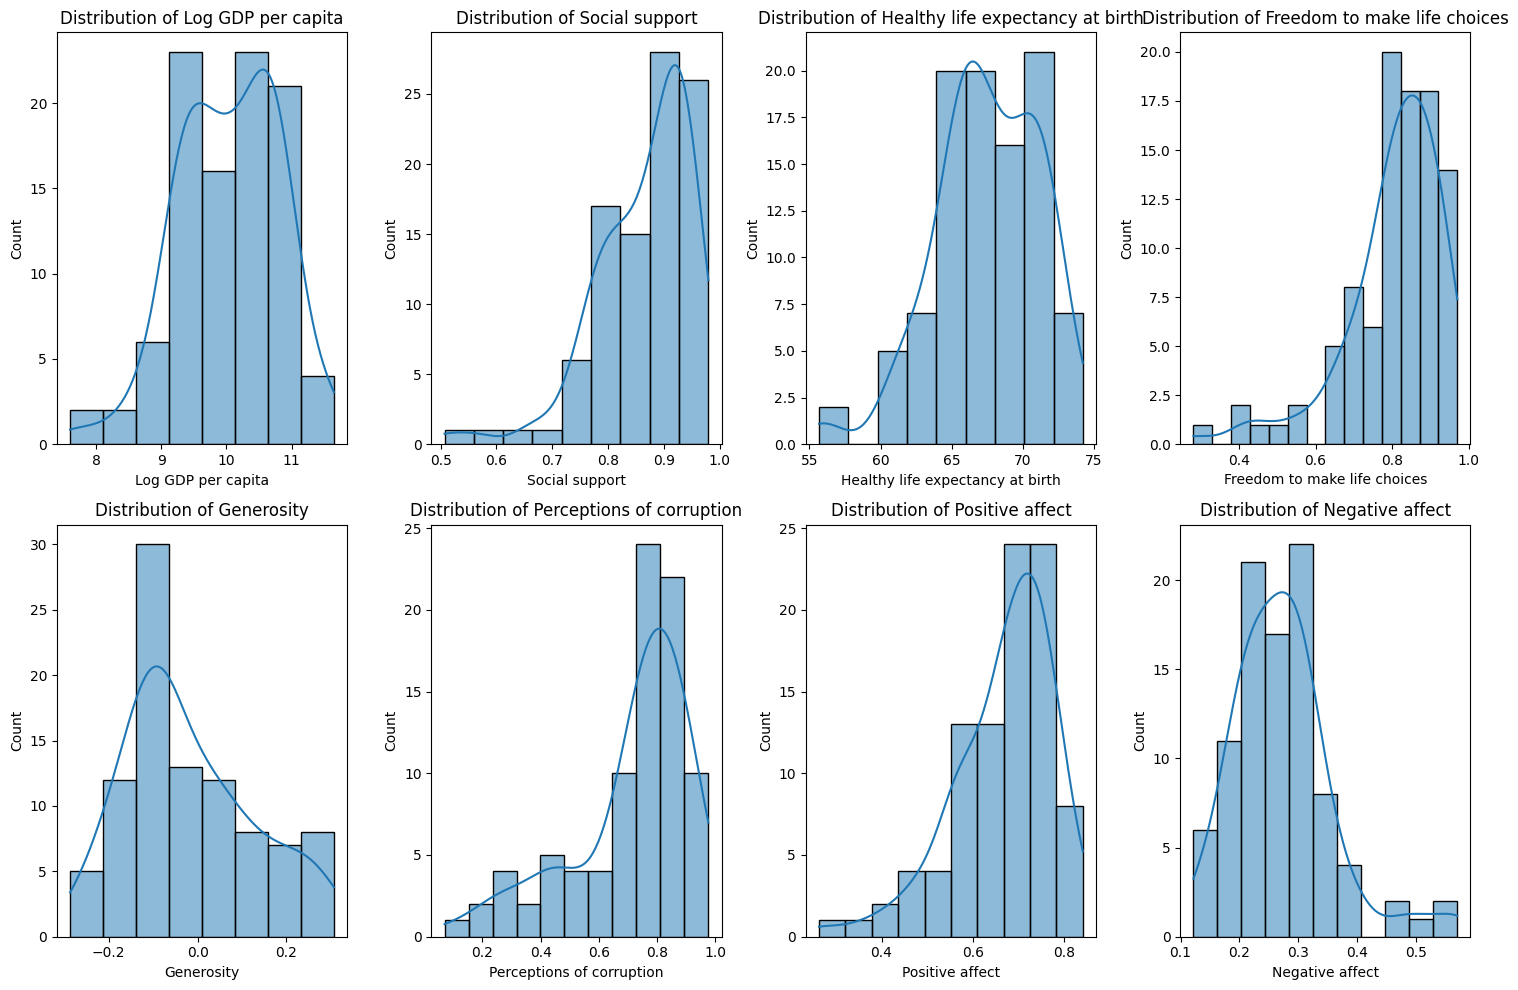

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
           'Positive affect', 'Negative affect']

f, axes = plt.subplots(2, 4, figsize=(15, 10))  # Adjusted the grid size and added a figure size

axes = axes.flatten()

for idx, column in enumerate(columns):
    sns.histplot(latest_data_per_country[column], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')

f.tight_layout()
plt.show()

In [28]:
latest_data_per_country.describe()

,year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Year,Death Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
count,98.000000,98.000000,97.000000,96.000000,98.000000,96.000000,95.000000,88.000000,94.000000,94.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,2018.244898,6.010908,10.040433,0.864375,67.511224,0.804479,-0.018895,0.710773,0.666989,0.274053,2018.244898,2354.724490,1.090353,7.270586,8.463685
std,3.211003,0.934301,0.776085,0.086319,3.638830,0.127715,0.145042,0.203496,0.108420,0.085284,3.211003,5683.449459,0.813756,5.199946,5.896850
min,2006.000000,2.179000,7.602000,0.507000,55.675000,0.281000,-0.287000,0.070000,0.263000,0.122000,2006.000000,2.000000,0.003545,0.011790,0.010926
25%,2018.000000,5.436500,9.458000,0.807500,65.600000,0.770000,-0.120500,0.655750,0.598250,0.213250,2018.000000,135.250000,0.625778,3.595111,3.653271
50%,2019.000000,6.114000,10.044000,0.887500,67.450000,0.827500,-0.061000,0.774000,0.681500,0.269500,2019.000000,563.000000,0.965528,6.971802,8.208796
75%,2020.000000,6.498500,10.645000,0.929250,70.768750,0.886000,0.075500,0.853500,0.744250,0.310750,2020.000000,1819.750000,1.446281,10.063601,12.169069
max,2021.000000,7.889000,11.649000,0.980000,74.225000,0.970000,0.307000,0.976000,0.841000,0.570000,2021.000000,45979.000000,4.760213,27.568870,25.698521
